In [1]:
### import the library and start it
library(h2o)
h2o.init(nthreads = -1)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/Rtmp115xWG/h2o_UnknownUser_started_from_r.out
    /tmp/Rtmp115xWG/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 748 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.28.0.3 
    H2O cluster version age:    1 month and 17 days  
    H2O cluster name:           H2O_started_from_R_root_wwn367 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.56 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost

In [2]:
### download the data
train_file <- "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz"
test_file <- "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz"

In [3]:
train <- h2o.importFile(train_file)
test <- h2o.importFile(test_file)

  |======================================================================| 100%
  |======================================================================| 100%


In [4]:
head(train)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,⋯,C776,C777,C778,C779,C780,C781,C782,C783,C784,C785
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,7


In [5]:
head(test)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,⋯,C776,C777,C778,C779,C780,C781,C782,C783,C784,C785
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,5


In [15]:
#### this is the target column
y <- 'C785'

In [16]:
## its the python equivalent for R in list remove
y <- "C785"  #response column: digits 0-9
x <- setdiff(names(train), y)  #vector of predictor column names

In [17]:
x

[1] "C1"   "C2"   "C3"   "C4"   "C5"   "C6"   "C7"   "C8"   "C9"   "C10" 
 [11] "C11"  "C12"  "C13"  "C14"  "C15"  "C16"  "C17"  "C18"  "C19"  "C20" 
 [21] "C21"  "C22"  "C23"  "C24"  "C25"  "C26"  "C27"  "C28"  "C29"  "C30" 
 [31] "C31"  "C32"  "C33"  "C34"  "C35"  "C36"  "C37"  "C38"  "C39"  "C40" 
 [41] "C41"  "C42"  "C43"  "C44"  "C45"  "C46"  "C47"  "C48"  "C49"  "C50" 
 [51] "C51"  "C52"  "C53"  "C54"  "C55"  "C56"  "C57"  "C58"  "C59"  "C60" 
 [61] "C61"  "C62"  "C63"  "C64"  "C65"  "C66"  "C67"  "C68"  "C69"  "C70" 
 [71] "C71"  "C72"  "C73"  "C74"  "C75"  "C76"  "C77"  "C78"  "C79"  "C80" 
 [81] "C81"  "C82"  "C83"  "C84"  "C85"  "C86"  "C87"  "C88"  "C89"  "C90" 
 [91] "C91"  "C92"  "C93"  "C94"  "C95"  "C96"  "C97"  "C98"  "C99"  "C100"
[101] "C101" "C102" "C103" "C104" "C105" "C106" "C107" "C108" "C109" "C110"
[111] "C111" "C112" "C113" "C114" "C115" "C116" "C117" "C118" "C119" "C120"
[121] "C121" "C122" "C123" "C124" "C125" "C126" "C127" "C128" "C129" "C130"
[131] "C131" "C132" "C133" "C134" "C135" "C136" "C137" "C138" "C139" "C140"
[141] "C141" "C142" "C143" "C144" "C145" "C146" "C147" "C148" "C149" "C150"
[151] "C151" "C152" "C153" "C154" "C155" "C156" "C157" "C158" "C159" "C160"
[161] "C161" "C162" "C163" "C164" "C165" "C166" "C167" "C168" "C169" "C170"
[171] "C171" "C172" "C173" "C174" "C175" "C176" "C177" "C178" "C179" "C180"
[181] "C181" "C182" "C183" "C184" "C185" "C186" "C187" "C188" "C189" "C190"
[191] "C191" "C192" "C193" "C194" "C195" "C196" "C197" "C198" "C199" "C200"
[201] "C201" "C202" "C203" "C204" "C205" "C206" "C207" "C208" "C209" "C210"
[211] "C211" "C212" "C213" "C214" "C215" "C216" "C217" "C218" "C219" "C220"
[221] "C221" "C222" "C223" "C224" "C225" "C226" "C227" "C228" "C229" "C230"
[231] "C231" "C232" "C233" "C234" "C235" "C236" "C237" "C238" "C239" "C240"
[241] "C241" "C242" "C243" "C244" "C245" "C246" "C247" "C248" "C249" "C250"
[251] "C251" "C252" "C253" "C254" "C255" "C256" "C257" "C258" "C259" "C260"
[261] "C261" "C262" "C263" "C264" "C265" "C266" "C267" "C268" "C269" "C270"
[271] "C271" "C272" "C273" "C274" "C275" "C276" "C277" "C278" "C279" "C280"
[281] "C281" "C282" "C283" "C284" "C285" "C286" "C287" "C288" "C289" "C290"
[291] "C291" "C292" "C293" "C294" "C295" "C296" "C297" "C298" "C299" "C300"
[301] "C301" "C302" "C303" "C304" "C305" "C306" "C307" "C308" "C309" "C310"
[311] "C311" "C312" "C313" "C314" "C315" "C316" "C317" "C318" "C319" "C320"
[321] "C321" "C322" "C323" "C324" "C325" "C326" "C327" "C328" "C329" "C330"
[331] "C331" "C332" "C333" "C334" "C335" "C336" "C337" "C338" "C339" "C340"
[341] "C341" "C342" "C343" "C344" "C345" "C346" "C347" "C348" "C349" "C350"
[351] "C351" "C352" "C353" "C354" "C355" "C356" "C357" "C358" "C359" "C360"
[361] "C361" "C362" "C363" "C364" "C365" "C366" "C367" "C368" "C369" "C370"
[371] "C371" "C372" "C373" "C374" "C375" "C376" "C377" "C378" "C379" "C380"
[381] "C381" "C382" "C383" "C384" "C385" "C386" "C387" "C388" "C389" "C390"
[391] "C391" "C392" "C393" "C394" "C395" "C396" "C397" "C398" "C399" "C400"
[401] "C401" "C402" "C403" "C404" "C405" "C406" "C407" "C408" "C409" "C410"
[411] "C411" "C412" "C413" "C414" "C415" "C416" "C417" "C418" "C419" "C420"
[421] "C421" "C422" "C423" "C424" "C425" "C426" "C427" "C428" "C429" "C430"
[431] "C431" "C432" "C433" "C434" "C435" "C436" "C437" "C438" "C439" "C440"
[441] "C441" "C442" "C443" "C444" "C445" "C446" "C447" "C448" "C449" "C450"
[451] "C451" "C452" "C453" "C454" "C455" "C456" "C457" "C458" "C459" "C460"
[461] "C461" "C462" "C463" "C464" "C465" "C466" "C467" "C468" "C469" "C470"
[471] "C471" "C472" "C473" "C474" "C475" "C476" "C477" "C478" "C479" "C480"
[481] "C481" "C482" "C483" "C484" "C485" "C486" "C487" "C488" "C489" "C490"
[491] "C491" "C492" "C493" "C494" "C495" "C496" "C497" "C498" "C499" "C500"
[501] "C501" "C502" "C503" "C504" "C505" "C506" "C507" "C508" "C509" "C510"
[511] "C511" "C512" "C513" "C514" "C515" "C516" "C517" "C518" "C519" "C520"
[521] "C521" "C522" "C523" "C524" "C525" "C526" "C

In [21]:
train

  C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15 C16 C17 C18 C19 C20 C21
1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
2  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
3  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
4  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
5  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
6  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
  C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32 C33 C34 C35 C36 C37 C38 C39 C40
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [22]:
test

  C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15 C16 C17 C18 C19 C20 C21
1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
2  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
3  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
4  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
5  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
6  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0
  C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32 C33 C34 C35 C36 C37 C38 C39 C40
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

## we make the target column factor other wise this classifier will try to regression

In [23]:
test[y] = as.factor(test[y])

In [24]:
train[y] = as.factor(train[y])

In [26]:
dl_model1 <- h2o.deeplearning(x,y,train)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping bad and constant columns: [C86, C85, C729, C728, C646, C645, C169, C760, C561, C53, C11, C55, C10, C54, C57, C12, C56, C58, C17, C19, C18, C731, C730, C20, C22, C21, C24, C23, C26, C25, C28, C27, C702, C701, C29, C700, C1, C2, C784, C3, C783, C4, C782, C5, C781, C6, C142, C7, C141, C8, C9, C31, C30, C32, C759, C758, C757, C756, C755, C477, C113, C674, C112, C673, C672, C84, C83].
”


  |======================================================================| 100%


#### Note: The warning about “Dropping constant columns” occurs because MNIST is a sparse dataset, and there exist entire columns where every value is zero. Constant columns do not add any value to the model, so they are automatically removed. Dont worry about the warning

In [27]:
dl_perf1 <- h2o.performance(model = dl_model1, newdata = test)

In [ ]:
## with epochs you can use this
#dl_model2 <- h2o.deeplearning(x,y,trainepochs = s = hs=200)

In [28]:
## this is the mse accuracy
h2o.mse(dl_perf1)

[1] 0.02654008

In [29]:
h2o.confusionMatrix(dl_perf1)

,0,1,2,3,4,5,6,7,8,9,Error,Rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,971,0,1,0,0,4,2,1,1,0,0.009183673,9 / 980
1,0,1125,2,2,0,1,1,1,3,0,0.008810573,"10 / 1,135"
2,2,0,1010,5,1,0,1,5,7,1,0.021317829,"22 / 1,032"
3,0,0,8,981,0,10,0,5,4,2,0.028712871,"29 / 1,010"
4,2,0,8,0,955,1,3,3,1,9,0.027494908,27 / 982
5,3,0,1,12,1,869,2,0,3,1,0.025784753,23 / 892
6,7,2,10,2,12,15,908,0,2,0,0.052192067,50 / 958
7,1,5,10,4,1,1,0,997,4,5,0.030155642,"31 / 1,028"
8,5,1,3,7,5,9,2,3,935,4,0.040041068,39 / 974


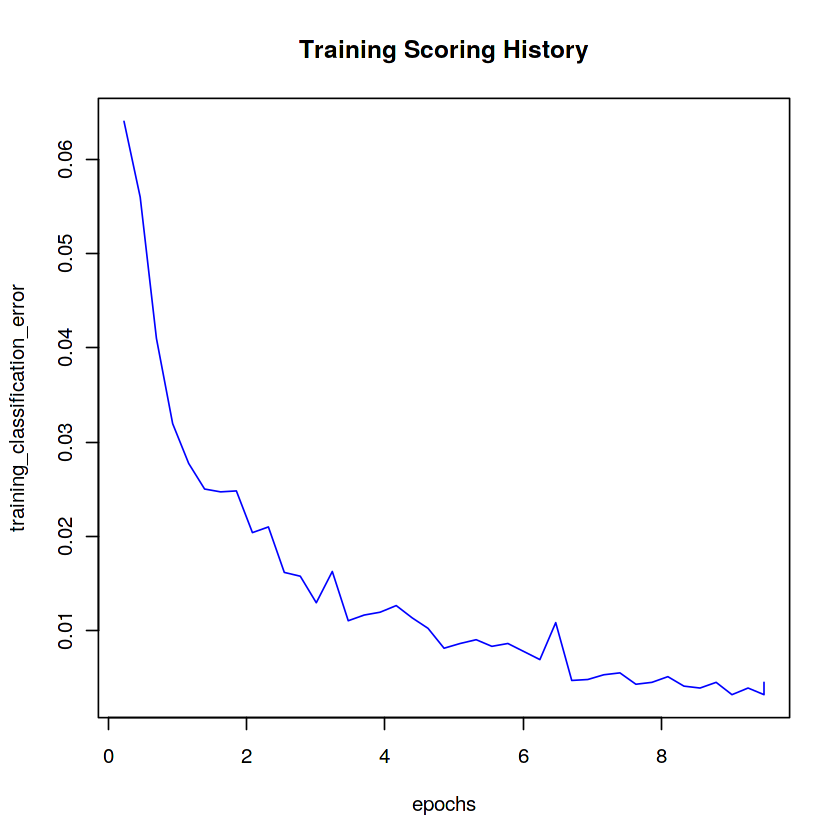

In [30]:
plot(dl_model1, 
     timestep = "epochs", 
     metric = "classification_error")

In [31]:
h2o.predict(dl_model1,test)

  |======================================================================| 100%


  predict           p0           p1           p2           p3           p4
1       8 4.958499e-11 1.087878e-14 2.691617e-15 5.074471e-14 1.625767e-13
2       3 1.365837e-20 3.327096e-18 9.091805e-18 1.000000e+00 2.608239e-16
3       8 4.378125e-09 5.449123e-33 2.176310e-15 1.250205e-20 2.475631e-19
4       0 1.000000e+00 8.301594e-27 3.169702e-16 5.268318e-25 4.131804e-14
5       1 7.462908e-10 9.999595e-01 1.034514e-07 3.661518e-10 9.634392e-07
6       5 1.809874e-25 9.204102e-29 2.454476e-25 6.566415e-33 5.715516e-25
            p5           p6           p7           p8           p9
1 3.175370e-13 1.324485e-15 6.953116e-18 1.000000e+00 2.642606e-12
2 2.207389e-10 2.442882e-21 6.604445e-15 3.967428e-12 1.277662e-11
3 4.270942e-11 4.171569e-15 2.958550e-28 1.000000e+00 2.256094e-22
4 1.223216e-20 4.275246e-09 2.707749e-20 2.092530e-17 1.617971e-19
5 4.292366e-11 5.945598e-10 2.126744e-06 3.717498e-05 8.102993e-08
6 1.000000e+00 1.360769e-20 1.383607e-25 3.750959e-13 6.491270e-30

[1000

In [32]:
h2o.performance(dl_model1,test)

H2OMultinomialMetrics: deeplearning

Test Set Metrics: 

MSE: (Extract with `h2o.mse`) 0.02654008
RMSE: (Extract with `h2o.rmse`) 0.1629113
Logloss: (Extract with `h2o.logloss`) 0.2023681
Mean Per-Class Error: 0.02991939
Confusion Matrix: Extract with `h2o.confusionMatrix(<model>, <data>)`)
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
         0    1    2    3   4   5   6    7   8   9  Error           Rate
0      971    0    1    0   0   4   2    1   1   0 0.0092 =      9 / 980
1        0 1125    2    2   0   1   1    1   3   0 0.0088 =   10 / 1,135
2        2    0 1010    5   1   0   1    5   7   1 0.0213 =   22 / 1,032
3        0    0    8  981   0  10   0    5   4   2 0.0287 =   29 / 1,010
4        2    0    8    0 955   1   3    3   1   9 0.0275 =     27 / 982
5        3    0    1   12   1 869   2    0   3   1 0.0258 =     23 / 892
6        7    2   10    2  12  15 908    0   2   0 0.0522 =     50 / 958
7        1    5   10    4   1   1   0  997   4   

In [33]:
### lets add hidden layer
dl_model1 <- h2o.deeplearning(x,y,train,
                             hidden = c(200,200,200)
                             )

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping bad and constant columns: [C86, C85, C729, C728, C646, C645, C169, C760, C561, C53, C11, C55, C10, C54, C57, C12, C56, C58, C17, C19, C18, C731, C730, C20, C22, C21, C24, C23, C26, C25, C28, C27, C702, C701, C29, C700, C1, C2, C784, C3, C783, C4, C782, C5, C781, C6, C142, C7, C141, C8, C9, C31, C30, C32, C759, C758, C757, C756, C755, C477, C113, C674, C112, C673, C672, C84, C83].
”


  |======================================================================| 100%


In [38]:
dl_model1@model$model_summary

layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,717,Input,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,200,Rectifier,0,0,0,0.23469461,0.31782913,0,0.020335707,0.07276365,0.4403711,0.04097705
3,200,Rectifier,0,0,0,0.01222452,0.02789867,0,-0.009615642,0.07513833,0.9867420,0.01664698
4,200,Rectifier,0,0,0,0.01899168,0.04830380,0,-0.005499023,0.07671243,0.9741400,0.03344992
5,10,Softmax,NA,0,0,0.24681134,0.37173736,0,-0.125044282,0.42239761,-0.1712547,0.03128593


# REMEMBER BY DEFAULT H2O RUNS 10 EPOCHS